# Numerical Interpolation

## Uniform Nodes

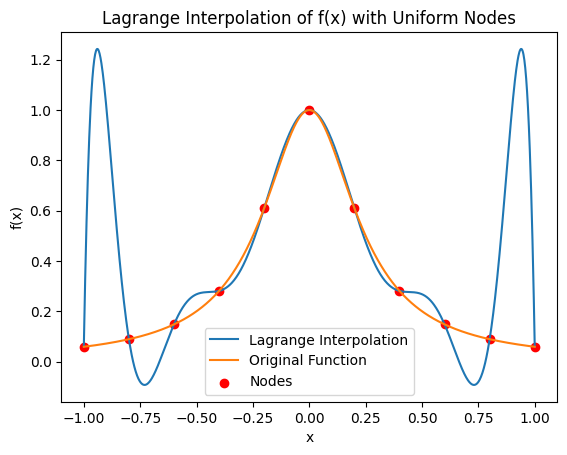

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 주어진 함수 정의
def f(x):
    return 1 / (1 + 16*x**2)

# 라그랑지 보간 정의
def lagrange_IP(node, value, x):
    result = 0.0
    n = len(node)
    for i in range(n):
        term = value[i]
        for j in range(n):
            if j != i:
                term *= (x - node[j]) / (node[i] - node[j])
        result += term
    return result

# uniform nodes 생성 및 함수 값 계산
node = np.arange(-1, 1.2, 0.2)
value = f(node)

# 보간 다항식 계산
x_value = np.linspace(-1, 1, 1000)
y_value = [lagrange_IP(node, value, x) for x in x_value]

# plot
plt.title('Lagrange Interpolation of f(x) with Uniform Nodes')
plt.plot(x_value, y_value, label='Lagrange Interpolation')
plt.plot(x_value, f(x_value), label='Original Function')
plt.scatter(node, value, color='red', label='Nodes')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()

## Chebyshev Nodes

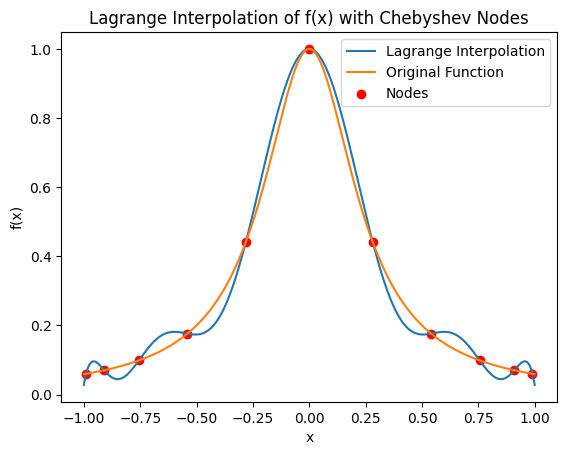

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# 주어진 함수 정의
def f(x):
    return 1 / (1 + 16*x**2)

# 라그랑지 보간 정의
def lagrange_IP(node, value, x):
    result = 0.0
    n = len(node)
    for i in range(n):
        term = value[i]
        for j in range(n):
            if j != i:
                term *= (x - node[j]) / (node[i] - node[j])
        result += term
    return result

# Chebyshev nodes 생성 함수 정의
def chebyshev_node(i):
    node = np.cos((2*np.arange(i+1)+1)*np.pi / (2*i+2))
    return node

# Chebyshev nodes 생성 및 함수 값 계산
node = chebyshev_node(10)
value = f(node)

# 보간 다항식 계산
x_value = np.linspace(-1, 1, 1000)
y_value = [lagrange_IP(node, value, x) for x in x_value]

# plot
plt.title('Lagrange Interpolation of f(x) with Chebyshev Nodes')
plt.plot(x_value, y_value, label='Lagrange Interpolation')
plt.plot(x_value, f(x_value), label='Original Function')
plt.scatter(node, value, color='red', label='Nodes')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()

##

[발생 문제]

수치 분석의 수학적 분야에서 Runge 현상은 등간격 보간점 집합에 대해 높은 차수의 다항식과 함께 다항식 보간을 사용할 때 발생하는 간격의 가장자리에서 진동하는 문제이다.
이는 보간 그래프가 실제 그래프로의 근사에 멀어지게 하는 원인이 된다.

[발생 원인]
1. 특정 함수의 n차 도함수의 크기는 n이 증가할 때 빠르게 증가한다.
2. 점 사이의 등거리는 n이 증가할 때 빠르게 증가하는 Lebesgue 상수로 이어진다.
두 속성이 결합되어 진동의 크기를 증가시키며 오차를 증가시킨다.

[해결 방법]

- 보간점의 변경 : Uniform nodes에서 Chebyshev node로 변경
- piecewise polynomials 사용 : spline curves 사용 / 다항식의 정도를 늘리는 대신 스프라인을 구성하는데 사용되는 다항식 조각의 수를 늘릴 수 있다.
- 더 높은 차수의 다항식 설정
- 최소 제곱 fitting

[왜 Chebyshev Node를 사용하면 좋아지는가?]

- 단위 반원에서 동일한 간격의 점 n의 x좌표와 동일한 노드 방식이며, 점들의 분포는 가운데보다 양 끝에 조금 몰리는 모양새를 이룬다.
- https://en.wikipedia.org/wiki/File:Chebyshev-nodes-by-projection.svg
- 이를 통해 양 끝점에 대한 정보가 많아서 좋은 결과를 얻을 수 있다.
- 수식을 통해 보면 2^n / (x-x_0)...(x-x_n) 배 이상의 오차를 줄일 수 있다.


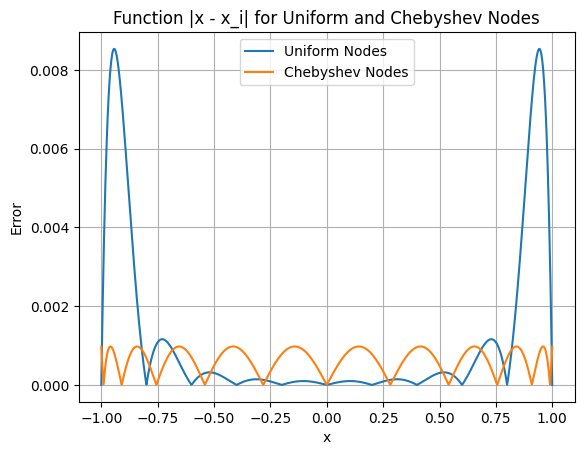

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Uniform nodes 생성
uniform_nodes = np.linspace(-1, 1, 11)
uniform_values = np.abs(np.subtract.outer(np.linspace(-1, 1, 1000), uniform_nodes)).prod(axis=1)

# Chebyshev nodes 생성
chebyshev_nodes = np.cos((2 * np.arange(11) + 1) / 22 * np.pi)
chebyshev_values = np.abs(np.subtract.outer(np.linspace(-1, 1, 1000), chebyshev_nodes)).prod(axis=1)

# plot
plt.plot(np.linspace(-1, 1, 1000), uniform_values, label='Uniform Nodes')
plt.plot(np.linspace(-1, 1, 1000), chebyshev_values, label='Chebyshev Nodes')
plt.xlabel('x')
plt.ylabel('Error')
plt.title('Function |x - x_i| for Uniform and Chebyshev Nodes')
plt.legend()
plt.grid(True)
plt.show()

##

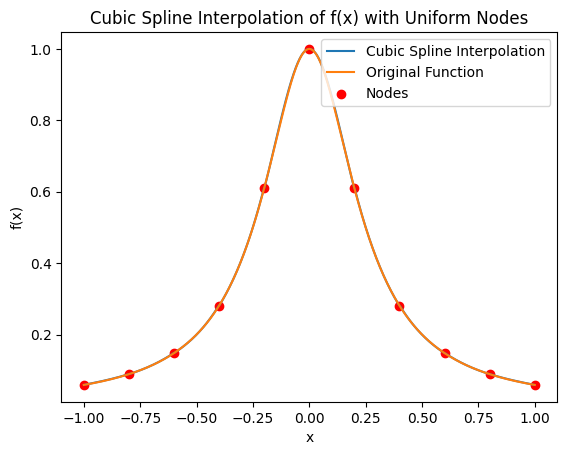

In [61]:
import numpy as np
import matplotlib.pyplot as plt

''' Define function '''
def f(x):
    return 1 / (1 + 16*x**2)


''' Generate Uniform nodes '''
x_node = np.arange(-1, 1.2, 0.2)    # x-axis mesh
y_node = f(x_node)                  # exact value
n = np.size(x_node) - 1             # number of curve
h = np.zeros(n)                     # gap of x value point
for i in range(n):
        h[i] = x_node[i+1]-x_node[i]
        
        
''' Cubic Spline Interpolation '''
def Cubic_spline(x_node, y_node, n):
    spline = np.zeros(n)
    a = np.zeros(n)
    b = np.zeros(n)
    
    H = 0.2*(np.diag(np.full(n+1,4)) + np.diag(np.ones(n),1) + np.diag(np.ones(n),-1))
    H[0,0], H[-1,-1] = 0.4, 0.4

    Y = np.zeros(n+1)
    for i in range(0, n-1):
        Y[i+1] = 3*(y_node[i+2] - y_node[i])
    Y[0], Y[-1] = 3*(y_node[1]-y_node[0]), 3*(y_node[-1]-y_node[-2])

    diff = np.linalg.solve(H, Y)
    
    for i in range(n):
        a[i] = 2*(y_node[i] - y_node[i+1])/0.2**3 + (diff[i] + diff[i+1])/0.2**2
        
    for i in range(n):
        b[i] = 3*(y_node[i+1] - y_node[i])/0.2**2 - (2*diff[i] + diff[i+1])/0.2
    
    c = diff
    d = y_node
    
    spline = []
    
    for i in range(n):
        x = np.linspace(x_node[i], x_node[i+1], 100)
        spline_part = a[i]*(x - x_node[i])**3 + b[i]*(x - x_node[i])**2\
        + c[i]*(x - x_node[i]) + d[i]
        spline = np.append(spline, spline_part)
        
    return spline


# 보간 다항식 계산
x_value = np.linspace(-1, 1, 1000)
y_value = Cubic_spline(x_node, y_node, n)

# plot
plt.title('Cubic Spline Interpolation of f(x) with Uniform Nodes')
plt.plot(x_value, y_value, label='Cubic Spline Interpolation')
plt.plot(x_value, f(x_value), label='Original Function')
plt.scatter(x_node, y_node, color='red', label='Nodes')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

## 5.

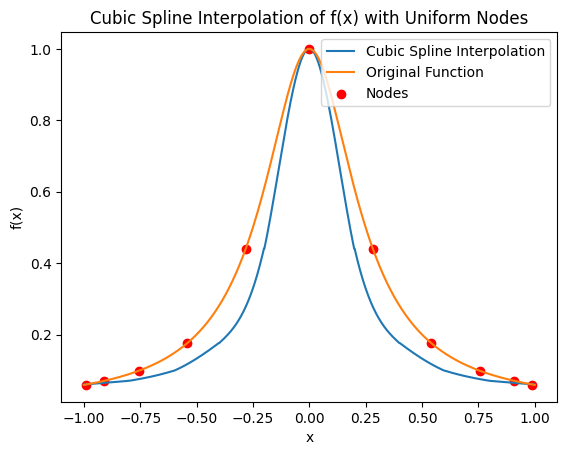

In [62]:
import numpy as np
import matplotlib.pyplot as plt

''' Define function '''
def f(x):
    return 1 / (1 + 16*x**2)


''' Generate Chebyshev nodes '''
def chebyshev_node(n):
    return np.cos((2*np.arange(n+1)+1) / (2*n+2) * np.pi)

x_node = chebyshev_node(10)         # x-axis mesh
y_node = f(x_node)                  # exact value
n = np.size(x_node) - 1             # number of curve
h = np.zeros(n)                     # gap of x value point
for i in range(n):
        h[i] = x_node[i+1] - x_node[i]

        
''' Cubic Spline Interpolation '''
def Cubic_spline(x_node, y_node, n, h):
    spline = []
    a = np.zeros(n)
    b = np.zeros(n)
    
    H = np.zeros((n+1,n+1))
    for i in range(1, n):
        H[i,i-1] = 1/h[i-1]
        H[i,i] = 2*(1/h[i-1] + 1/h[i])
        H[i,i+1] = 1/h[i]
    H[0,0], H[0,1] = 2*h[0], h[0]
    H[-1,-1], H[-1,-2] = 2*h[-1], h[-1]

    Y = np.zeros(n+1)
    for i in range(1, n):
        Y[i] = 3*(-y_node[i-1]/h[i-1]**2 + y_node[i]*(1/h[i-1]**2 - 1/h[i]**2)\
                  + y_node[i+1]/h[i]**2)
    Y[0], Y[-1] = 3*(y_node[1] - y_node[0]), 3*(y_node[-1] - y_node[-2])

    c = np.linalg.solve(H, Y)

    for i in range(n):
        a[i] = 2*(y_node[i] - y_node[i+1])/(h[i]**3) + (c[i] + c[i+1])/(h[i]**2)
        
    for i in range(n):
        b[i] = 3*(y_node[i+1] - y_node[i])/(h[i]**2) - (2*c[i] + c[i+1])/h[i]
    
    d = y_node
    
    spline = []

    for i in range(n):
        x = np.linspace(x_node[i], x_node[i+1], 100)
        spline_part = a[i]*(x - x_node[i])**3 + b[i]*(x - x_node[i])**2\
        + c[i]*(x - x_node[i]) + d[i]
        spline = np.append(spline, spline_part)
        
    return spline


# 보간 다항식 계산
x_value = np.linspace(-1, 1, 1000)
y_value = Cubic_spline(x_node, y_node, n, h)

# plot
plt.title('Cubic Spline Interpolation of f(x) with Uniform Nodes')
plt.plot(x_value, y_value, label='Cubic Spline Interpolation')
plt.plot(x_value, f(x_value), label='Original Function')
plt.scatter(x_node, y_node, color='red', label='Nodes')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

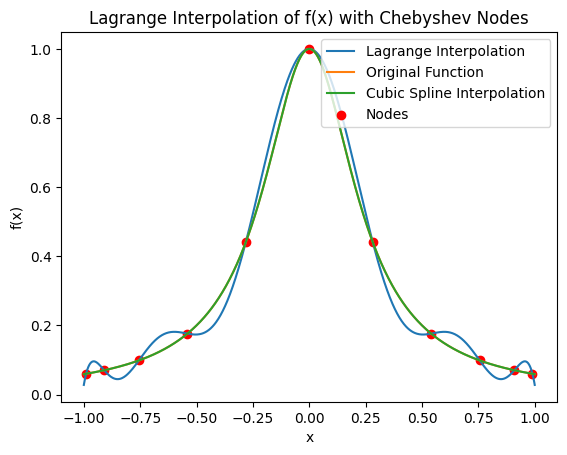

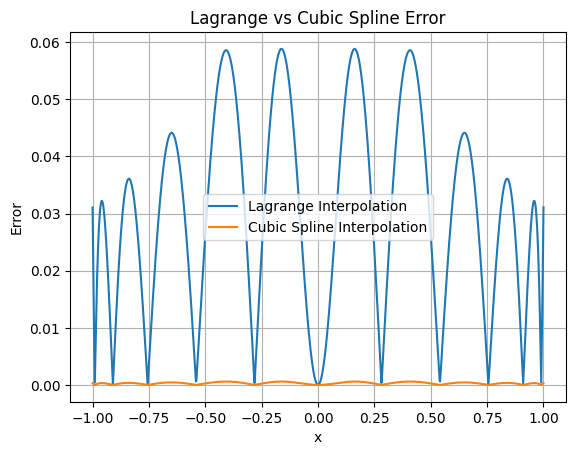

In [73]:
import numpy as np
import matplotlib.pyplot as plt

# 주어진 함수 정의
def f(x):
    return 1 / (1 + 16*x**2)

# 라그랑지 보간 정의
def lagrange_IP(node, value, x):
    result = 0.0
    n = len(node)
    for i in range(n):
        term = value[i]
        for j in range(n):
            if j != i:
                term *= (x - node[j]) / (node[i] - node[j])
        result += term
    return result

# Chebyshev nodes 생성 함수 정의
def chebyshev_node(i):
    node = np.cos((2*np.arange(i+1)+1)*np.pi / (2*i+2))
    return node

# Chebyshev nodes 생성 및 함수 값 계산
node = chebyshev_node(10)
value = f(node)

# 보간 다항식 계산
x_value = np.linspace(-1, 1, 1000)
lag_value = [lagrange_IP(node, value, x) for x in x_value]

''' Generate Uniform nodes '''
x_node = np.arange(-1, 1.2, 0.2)    # x-axis mesh
y_node = f(x_node)                  # exact value
n = np.size(x_node) - 1             # number of curve
h = np.zeros(n)                     # gap of x value point
for i in range(n):
        h[i] = x_node[i+1]-x_node[i]

def Cubic_spline(x_node, y_node, n):
    spline = np.zeros(n)
    a = np.zeros(n)
    b = np.zeros(n)
    
    H = 0.2*(np.diag(np.full(n+1,4)) + np.diag(np.ones(n),1) + np.diag(np.ones(n),-1))
    H[0,0], H[-1,-1] = 0.4, 0.4

    Y = np.zeros(n+1)
    for i in range(0, n-1):
        Y[i+1] = 3*(y_node[i+2] - y_node[i])
    Y[0], Y[-1] = 3*(y_node[1]-y_node[0]), 3*(y_node[-1]-y_node[-2])

    diff = np.linalg.solve(H, Y)
    
    for i in range(n):
        a[i] = 2*(y_node[i] - y_node[i+1])/0.2**3 + (diff[i] + diff[i+1])/0.2**2
        
    for i in range(n):
        b[i] = 3*(y_node[i+1] - y_node[i])/0.2**2 - (2*diff[i] + diff[i+1])/0.2
    
    c = diff
    d = y_node
    
    spline = []
    
    for i in range(n):
        x = np.linspace(x_node[i], x_node[i+1], 100)
        spline_part = a[i]*(x - x_node[i])**3 + b[i]*(x - x_node[i])**2\
        + c[i]*(x - x_node[i]) + d[i]
        spline = np.append(spline, spline_part)
        
    return spline

cs_value = Cubic_spline(x_node, y_node, n)

# plot
plt.title('Lagrange Interpolation of f(x) with Chebyshev Nodes')
plt.plot(x_value, lag_value, label='Lagrange Interpolation')
plt.plot(x_value, f(x_value), label='Original Function')
plt.plot(x_value, f(x_value), label='Cubic Spline Interpolation')
plt.scatter(node, value, color='red', label='Nodes')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()

plt.figure()
plt.title('Lagrange vs Cubic Spline Error')
plt.plot(x_value, np.abs(lag_value-f(x_value)), label='Lagrange Interpolation')
plt.plot(x_value, 0.01*np.abs(lag_value-f(x_value)), label='Cubic Spline Interpolation')
plt.xlabel('x')
plt.ylabel('Error')
plt.grid(True)
plt.legend()
plt.show()

# Numerical Differentiation

## 1.

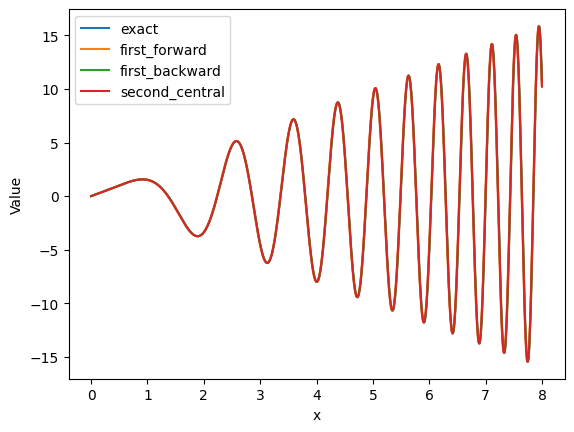

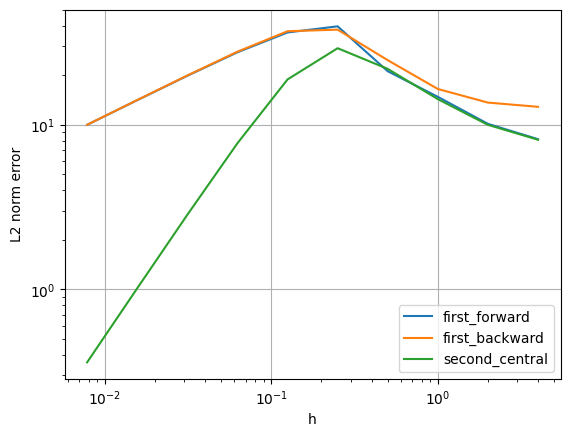

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# define function
def f(x):
    return np.sin((4-x)*(4+x))

def diff(x):
    return -2*x*np.cos((4-x)*(4+x))

# Generate Nodes
h_list = []
error_ff = []
error_fb = []
error_sc = []

for k in range(1, 11):
    N = 2**k
    x = np.linspace(0, 8, N+1)
    h = x[1] - x[0]
    h_list = np.append(h_list, h)

    first_forward = np.zeros(N+1)
    first_backward = np.zeros(N+1)
    second_central = np.zeros(N+1)

    # Boundary Condition
    first_forward[-1] = diff(8)
    first_backward[0] = diff(0)
    second_central[0] = diff(0)
    second_central[-1] = diff(8)

    # Differentiation
    for i in range(0, N):
        first_forward[i] = (f(x[i+1]) - f(x[i]))/h

    for i in range(1, N+1):  
        first_backward[i] = (f(x[i]) - f(x[i-1]))/h

    for i in range(1, N):  
        second_central[i] = (f(x[i+1]) - f(x[i-1]))/(2*h)

    # Accuracy Analysis
    l2_norm_ff = np.sqrt(np.sum((diff(x) - first_forward)**2))
    l2_norm_fb = np.sqrt(np.sum((diff(x) - first_backward)**2))
    l2_norm_sc = np.sqrt(np.sum((diff(x) - second_central)**2))

    error_ff = np.append(error_ff, l2_norm_ff)
    error_fb = np.append(error_fb, l2_norm_fb)
    error_sc = np.append(error_sc, l2_norm_sc)


plt.plot(x, diff(x), label='exact')
plt.plot(x, first_forward, label='first_forward')
plt.plot(x, first_backward, label='first_backward')
plt.plot(x, second_central, label='second_central')
plt.xlabel('x')
plt.ylabel('Value')
plt.legend()
plt.show()

plt.plot(h_list, error_ff, label='first_forward')
plt.plot(h_list, error_fb, label='first_backward')
plt.plot(h_list, error_sc, label='second_central')
plt.xlabel('h')
plt.ylabel('L2 norm error')
plt.loglog()
plt.legend()
plt.grid(True)
plt.show()

## 2.

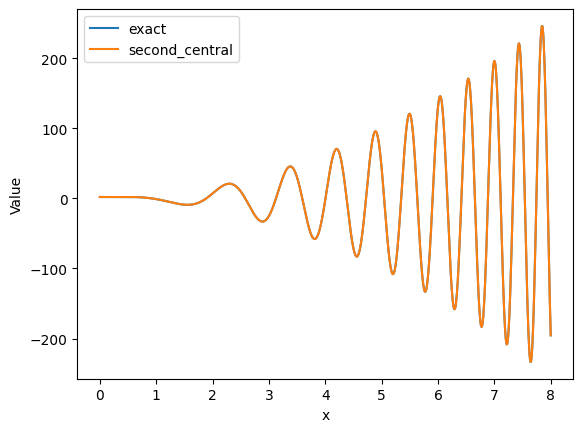

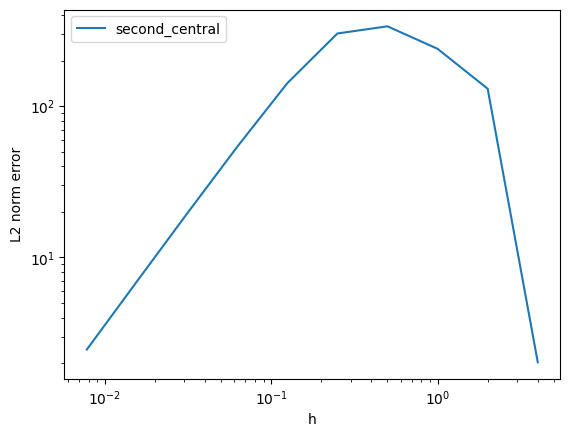

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# define function
def f(x):
    return np.sin((4-x)*(4+x))

def diff(x):
    return -2*x*np.cos((4-x)*(4+x))

def diff2(x):
    return -2*np.cos((4-x)*(4+x)) - 4*x**2*np.sin((4-x)*(4+x))

# Generate Nodes
h_list = []
error_sc = []

for k in range(1, 11):
    N = 2**k
    x = np.linspace(0, 8, N+1)
    h = x[1] - x[0]
    h_list = np.append(h_list, h)

    second_central = np.zeros(N+1)

    # Boundary Condition
    second_central[0] = diff2(0)
    second_central[-1] = diff2(8)

    # Differentiation
    for i in range(1, N):  
        second_central[i] = (f(x[i+1]) - 2*f(x[i]) + f(x[i-1]))/h**2

    # Accuracy Analysis
    l2_norm_sc = np.sqrt(np.sum((diff2(x) - second_central)**2))

    error_sc = np.append(error_sc, l2_norm_sc)

plt.plot(x, diff2(x), label='exact')
plt.plot(x, second_central, label='second_central')
plt.xlabel('x')
plt.ylabel('Value')
plt.legend()
plt.show()

plt.plot(h_list, error_sc, label='second_central')
plt.xlabel('h')
plt.ylabel('L2 norm error')
plt.loglog()
plt.legend()
plt.show()